In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
test = pd.read_csv('Rossmann_test.csv')
train=pd.read_csv('Rossmann_train.csv')
store=pd.read_csv('Rossmann_store.csv')

train["StateHoliday"].replace("0",0,inplace=True)

closed = train[train['Open'] == 0]['DayOfWeek']
closed=pd.DataFrame(closed, columns=['DayOfWeek'])

train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

train['AvgPurchase'] = train.Sales / train.Customers
train.AvgPurchase.fillna(0, inplace=True)

train["Date"] = pd.to_datetime(train["Date"])
train.set_index("Date", inplace=True)
train["Year"] = train.index.year.astype('int64') 
train["Month"] = train.index.month.astype('int64')

def season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"

train["Season"] = train["Month"].apply(season)

store_sales = train.groupby('Store')['Sales'].sum().reset_index()
sales_threshold = store_sales['Sales'].quantile(0.8)

store_sales20 = store_sales[store_sales['Sales'] >= sales_threshold]

# Filters the train dataframe based on the top 20% stores
final_train = train[train['Store'].isin(store_sales20['Store'])]

store.Promo2SinceWeek.fillna(0, inplace=True)
store.Promo2SinceYear.fillna(0, inplace=True)
store.PromoInterval.fillna(0, inplace=True)

from sklearn.impute import KNNImputer

# Create a DataFrame with the columns that need imputation
columns_to_impute = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
col = store[columns_to_impute].copy() 

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_data = imputer.fit_transform(col)

# Create a DataFrame with the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the missing values in the original DataFrame with the imputed values
store[columns_to_impute] = imputed_df

x = final_train.reset_index()

merged_sales = x.merge(store, how='left', on='Store')
merged_sales = merged_sales[merged_sales['Customers'] != 7388]
#merged_sales.set_index('Date', inplace=True)

C:\Users\jhkan\AppData\Local\Temp\ipykernel_21684\335980550.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('Rossmann_train.csv')


In [2]:
multiple_occurrences = merged_sales['Store'].value_counts()  # Counts the occurrences of each value

# Filter rows with values from 'ColumnA' that have multiple occurrences
values_with_multiple_occurrences = multiple_occurrences[multiple_occurrences > 1].index.tolist()
filtered_df = merged_sales[merged_sales['Store'].isin(values_with_multiple_occurrences)]

filtered_df.sort_values(by='Store', ascending=[True]).value_counts('Store')

Store
733     942
682     942
769     942
1097    942
335     942
       ... 
974     622
820     622
539     622
342     621
909     607
Length: 223, dtype: int64

C:\Users\jhkan\AppData\Local\Temp\ipykernel_21684\2202314489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['Rolling_Mean'] = rolling_mean


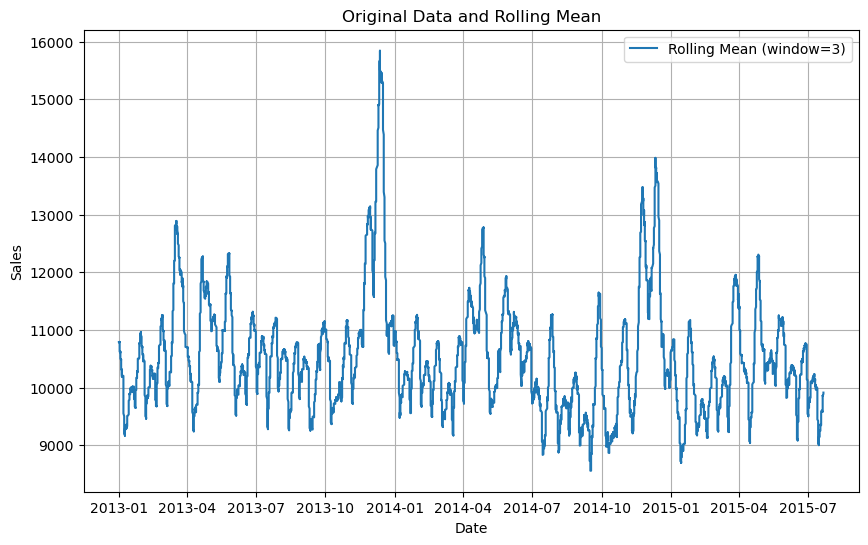

In [37]:
store = filtered_df[filtered_df['CompetitionOpenSinceYear'] > 2013]
rolling_mean = store['Sales'].rolling(window= 200).mean()

# Add the rolling mean as a new column to the DataFrame
store['Rolling_Mean'] = rolling_mean

# Plot the original data and the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(store['Date'], store['Rolling_Mean'], label='Rolling Mean (window=3)')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Data and Rolling Mean')
plt.legend()
plt.grid(True)

plt.show()

C:\Users\jhkan\AppData\Local\Temp\ipykernel_21684\2745725761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['Rolling_Mean'] = rolling_mean


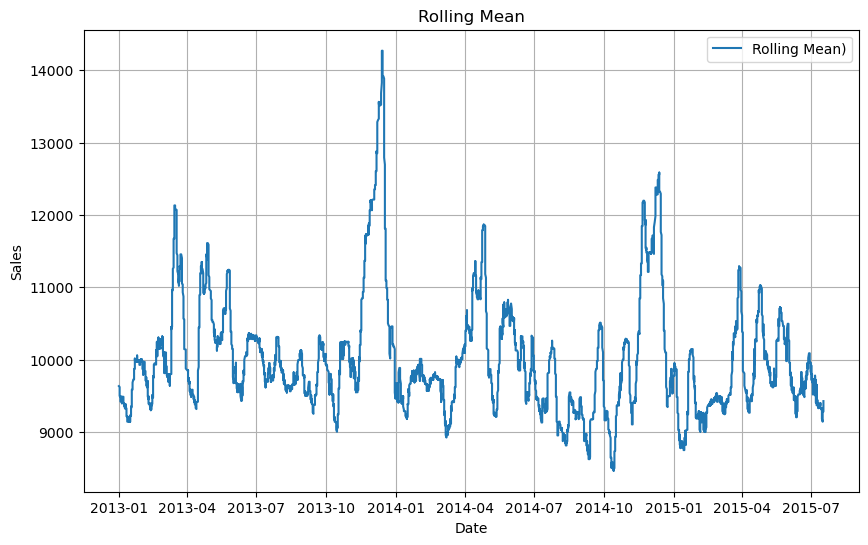

In [39]:
store = filtered_df[filtered_df['CompetitionOpenSinceYear'] > 2013]
rolling_mean = store['Sales'].rolling(window= 250).median()

# Add the rolling mean as a new column to the DataFrame
store['Rolling_Mean'] = rolling_mean

# Plot the original data and the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(store['Date'], store['Rolling_Mean'], label='Rolling Mean)')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Rolling Mean')
plt.legend()
plt.grid(True)

plt.show()